In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("adult.csv")
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [20]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [25]:
df.replace('?',np.nan,inplace=True)
df.dropna(inplace=True)
df.drop(['fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race'],axis=1)

,age,workclass,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,Male,0,0,40,United-States,<=50K
1,38,Private,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Male,0,0,40,United-States,>50K
3,44,Private,Male,7688,0,40,United-States,>50K
5,34,Private,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...
48837,27,Private,Female,0,0,38,United-States,<=50K
48838,40,Private,Male,0,0,40,United-States,>50K
48839,58,Private,Female,0,0,40,United-States,<=50K
48840,22,Private,Male,0,0,20,United-States,<=50K


In [26]:
X=df.drop('income',axis=1)
y=LabelEncoder().fit_transform(df['income'])

In [27]:
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=2)
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Model Accuracy:",accuracy_score(y_test,y_pred))

Model Accuracy: 0.834628785848298


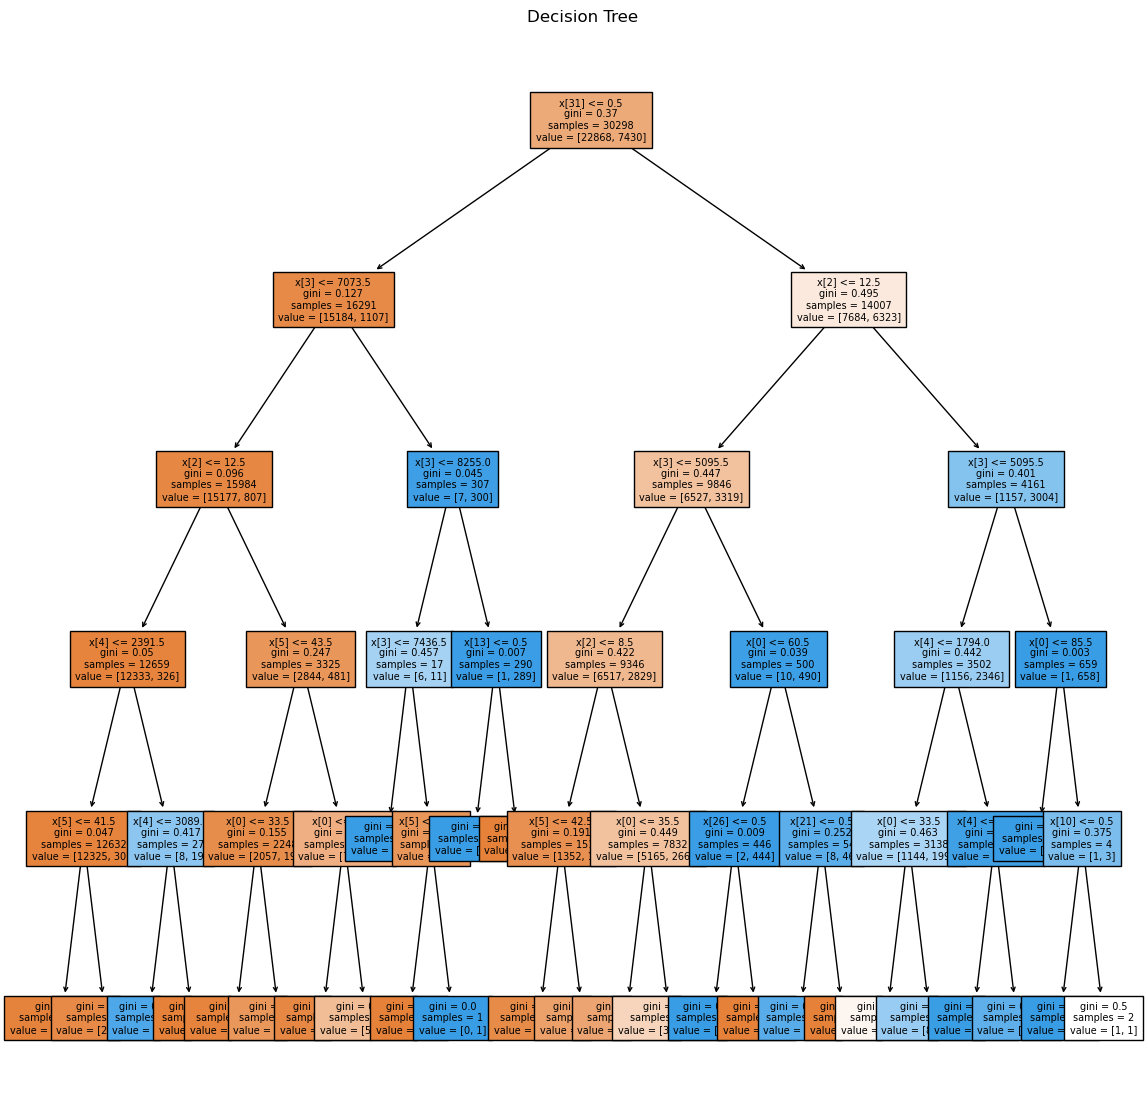

In [28]:
plt.figure(figsize=(14,14))
plot_tree(clf,fontsize=7,filled=True)
plt.title("Decision Tree")
plt.show()